In [1]:
from Inception_V3 import Inception_V3
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import math
import random

In [2]:
model = Inception_V3()

In [3]:
img1_path = "./imgs/img4.jpg"
result = model.predict(img1_path)

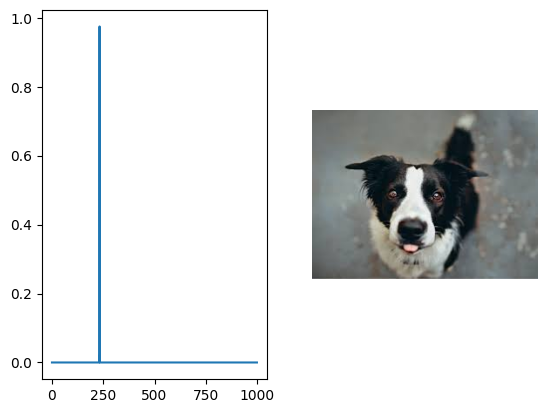

In [4]:
fig, axs = plt.subplots(1, 2)
img = mpimg.imread(img1_path)
axs[0].plot(result)
axs[1].imshow(img)
axs[1].axis("off")
plt.show()

In [5]:
categories = model.topCategories(result, 5)
for category, value in categories:
  print(category + ":" , value)

Border collie: 0.9747435450553894
collie: 0.025084590539336205
Cardigan: 6.866965850349516e-05
kelpie: 4.983628241461702e-05
sea urchin: 3.195569888703176e-06


In [6]:
users_imgs = []
users_path = os.listdir('users')
users_path = list(sorted(users_path))
for user_path in users_path:
  users_imgs.append([os.path.join('users', user_path, file) for file in os.listdir(os.path.join("users", user_path))])

print(users_imgs)

[['users/user1/9052220.jpg', 'users/user1/4918062.jpg', 'users/user1/2413751.jpg'], ['users/user2/7426314.jpg', 'users/user2/5394925.jpg', 'users/user2/6005046.jpg', 'users/user2/7012419.jpg', 'users/user2/5335991.jpg'], ['users/user3/5846804.jpg', 'users/user3/9714834.jpg', 'users/user3/3771729.jpg', 'users/user3/9349092.jpg', 'users/user3/9308528.jpg'], ['users/user4/5846804.jpg', 'users/user4/9714834.jpg', 'users/user4/3771729.jpg', 'users/user4/9349092.jpg', 'users/user4/9308528.jpg']]


In [7]:
users_preferences = []
for user in users_imgs:
  user_preferences = []
  for img_path in user:
    result = model.predict(img_path)
    user_preferences.append(result)
  users_preferences.append(user_preferences)

In [8]:
mean_users_preferences = []
for user_preferences in users_preferences:
  mean_user_preferences = []
  for i in range(len(model.categories)):
    prob_sum = 0
    for j in range(len(user_preferences)):
      prob_sum += user_preferences[j][i]
    mean = prob_sum / len(user_preferences)
    mean_user_preferences.append(mean)
  mean_users_preferences.append(mean_user_preferences)

print((len(mean_users_preferences), len(mean_users_preferences[0])))


(4, 1000)


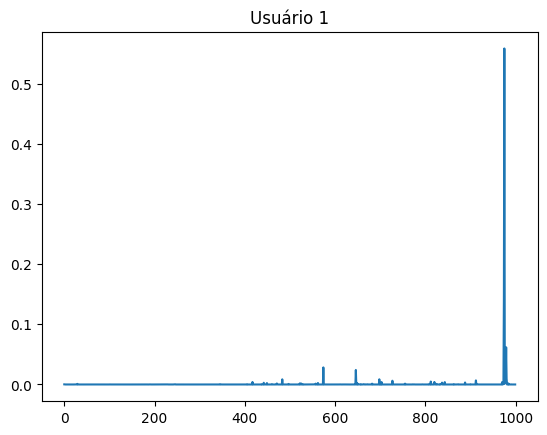

[('lakeside', 0.5584103241562843), ('geyser', 0.14308794707176276), ('valley', 0.061744102742522955), ('sandbar', 0.03769249173365097), ('golf ball', 0.02836221053924722), ('maze', 0.024115743185878575), ('seashore', 0.014369953513930037), ('volcano', 0.009768520093833407), ('palace', 0.008582607353067337), ('castle', 0.008532071175674597)]


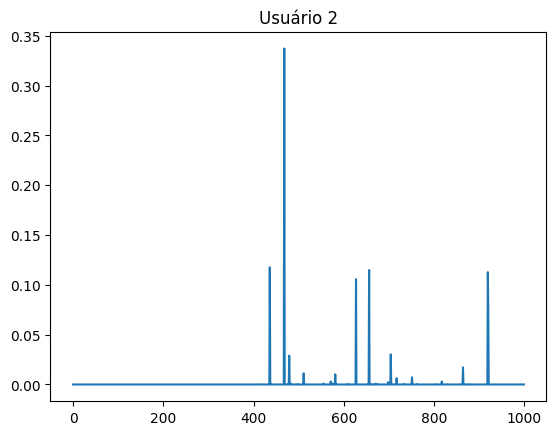

[('cab', 0.33732659397646786), ('beach wagon', 0.11766923727409448), ('minivan', 0.11489334254874847), ('street sign', 0.11278545057193697), ('limousine', 0.10570694797497708), ('traffic light', 0.07667755165939524), ('parking meter', 0.0302064859381062), ('car wheel', 0.028932552684455003), ('tow truck', 0.01715768992435187), ('convertible', 0.011168930254825682)]


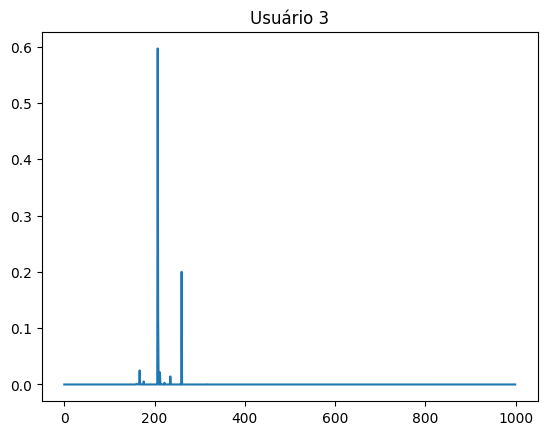

[('golden retriever', 0.5966586877574545), ('chow', 0.2000831045002466), ('Labrador retriever', 0.12209062653351437), ('English foxhound', 0.024952880434885787), ('English setter', 0.021591029898044626), ('German shepherd', 0.014266464811285883), ('Saluki', 0.005339331858546223), ('kuvasz', 0.0030039504411690787), ('Walker hound', 0.0020766186688595755), ('Afghan hound', 0.001174333131324473)]


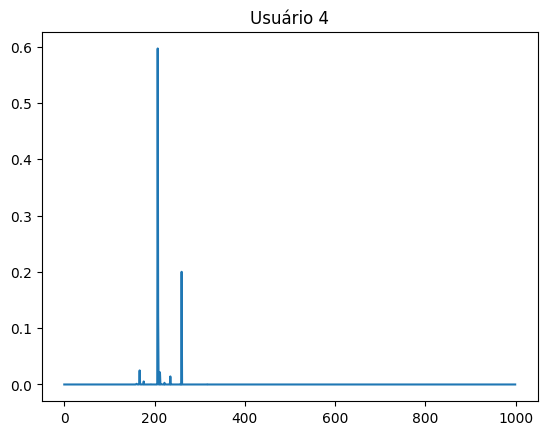

[('golden retriever', 0.5966586877574545), ('chow', 0.2000831045002466), ('Labrador retriever', 0.12209062653351437), ('English foxhound', 0.024952880434885787), ('English setter', 0.021591029898044626), ('German shepherd', 0.014266464811285883), ('Saluki', 0.005339331858546223), ('kuvasz', 0.0030039504411690787), ('Walker hound', 0.0020766186688595755), ('Afghan hound', 0.001174333131324473)]


In [9]:
for i, user in enumerate(mean_users_preferences):
  plt.plot(user)
  plt.title("Usuário " + str(i + 1))
  plt.show()
  print(model.topCategories(user, 10))

Obs.: Usuários 3 e 4 são iguais para testar a divergência de Kulback-Leibler

[1, 2]: 18.661067002578754


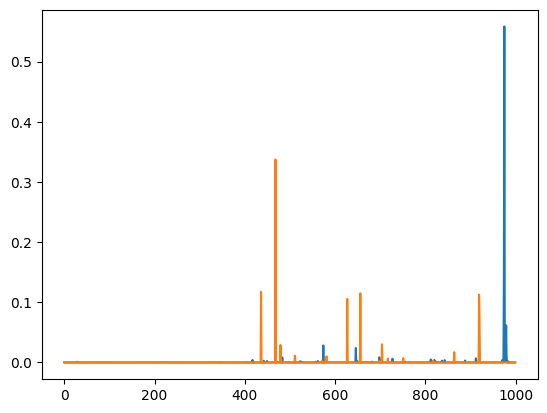

[1, 3]: 19.875547734578912


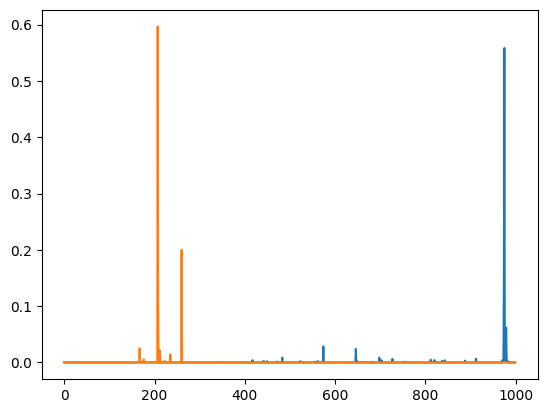

[1, 4]: 19.875547734578912


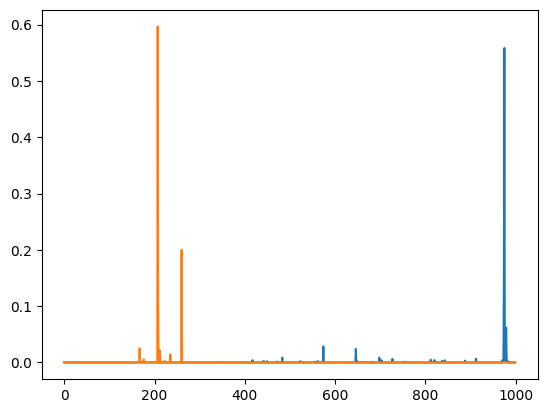

[2, 3]: 22.56052528717906


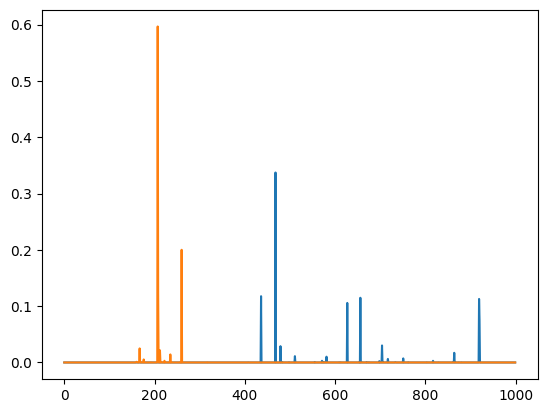

[2, 4]: 22.56052528717906


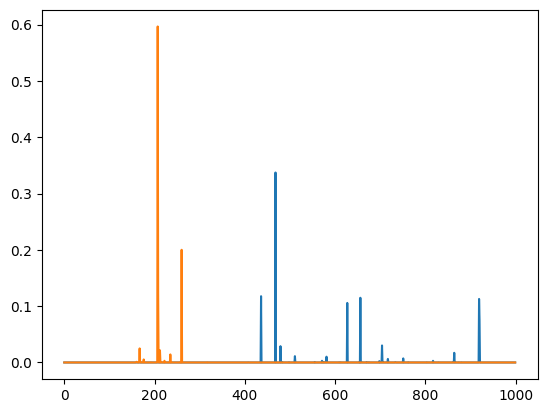

[3, 4]: 0.0


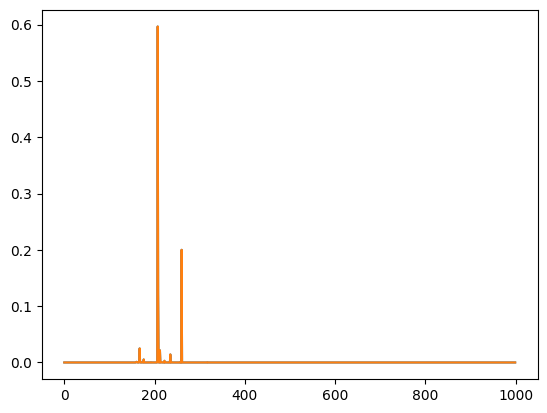

In [10]:
tam = len(mean_users_preferences)
for i in range(tam):
  for j in range(i+1, tam):
    userA = mean_users_preferences[i]
    userB = mean_users_preferences[j]

    DklAB = 0
    for k in range(len(userA)):
      DklAB += userA[k] * math.log(userA[k] / userB[k])

    DklBA = 0
    for k in range(len(userA)):
      DklBA += userB[k] * math.log(userB[k] / userA[k])

    Dkl = DklBA + DklAB
    
    print("[" + str(i + 1) + ", " + str(j + 1) + "]:", Dkl)

    plt.plot(userA)
    plt.plot(userB)
    plt.show()

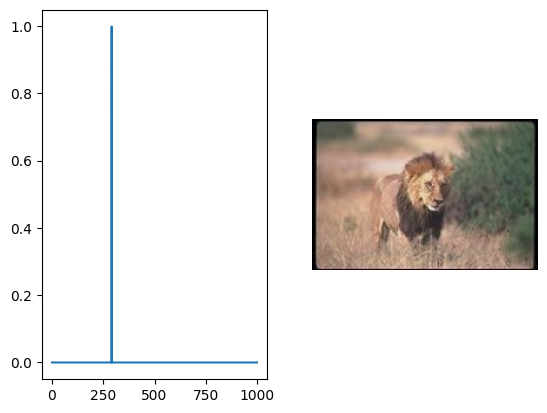

lion: 0.998573899269104
cheetah: 0.0014132836367934942
leopard: 2.400537368885125e-06
jaguar: 8.156536068781861e-07
Arabian camel: 5.178724791221612e-07
dhole: 3.065236455768172e-07
brown bear: 2.776604048904119e-07
zebra: 2.53120504112303e-07
Australian terrier: 2.361125268635078e-07
hartebeest: 2.3080933431174344e-07


In [11]:
num = random.randint(1, 961)
img1_path = "./Generalist961/image" + str(num) + ".jpg"
result = model.predict(img1_path)

fig, axs = plt.subplots(1, 2)
img = mpimg.imread(img1_path)
axs[0].plot(result)
axs[1].imshow(img)
axs[1].axis("off")
plt.show()

categories = model.topCategories(result, 10)
for category, value in categories:
  print(category + ":" , value)